**Juned Miah** *2220820*

# CS-165 Introduction to Data Science
## Assignment 1: Applied Data Science

# Introduction








Forest fires pose a significant threat to the environment and human well-being, causing extensive damage to ecosystems and endangering biodiversity. Human-induced forest fires are a pressing issue worldwide.

According to the National Park Service, people are responsible for almost 85% of wildland fires in the United States. These fires happen because of different human activities like leaving campfires unattended, burning waste, equipment use and accidents, throwing away cigarettes carelessly, and even purposeful arson. (National Park Service, 2022) 

However, forest fires can also be caused by natural factors such as dry conditions, high temperatures, lightning, and volcanic eruptions. (National Park Service, 2022) Unfortunately, climate change has resulted in more frequent and intense forest fires over the last ten years.

Machine learning algorithms have grown in importance in the prediction and prevention of forest fires. Machine learning algorithms can find trends and predict the possibility of future forest fires with high accuracy using historical data on forest fires and numerous climatic variables such as temperature, humidity, wind speed, and rain. As a result, determining if particular factors can be used to predict whether a forest fire has occurred or will occur, as well as how accurate they will be, becomes critical in adopting machine learning algorithms to prevent and control forest fires. These models can also assist wildfire organisations in efficiently allocating resources and responding rapidly to an impending forest fire. (Sathishkumar, V.E. et al. 2023.)

This notebook will look at the Forest Fires dataset from the UCI Machine Learning Repository. The dataset contains information involving forest fires in two regions of Algeria, with the goal of identifying whether a forest fire exists in a specific region. (ABID, F. 2020.) Algeria is one such country that is frequently affected by forest fires, especially during the summer months. These fires have become a significant concern for Algerian authorities, as they cause significant environmental and economic damage (Al Jazeera 2021).

This notebook will study the Algerian forest fires dataset to find out some interesting information by analyzing the trends. This will help figure out if it's possible to predict whether a forest fire might happen in a particular area of Algeria. The purpose of doing this is to help develop an early warning system for forest fires. This system could play a vital role in preventing and managing forest fires in Algeria.

### Data Description


The dataset contains 244 instances, each with 13 attributes. The attributes are described below:

1. Day : day of the month 
2. Month : month of the year ('june' to 'september')
3. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
4. RH : Relative Humidity in %: 21 to 90
5. Ws : Wind speed in km/h: 6 to 29
6. Rain: total day in mm: 0 to 16.8
7. Fine Fuel Moisture Code (FFMC) : index from the FWI system: 28.6 to 92.5
8. Duff Moisture Code (DMC) :  index from the FWI system: 1.1 to 65.9
9. Drought Code (DC) :  index from the FWI system: 7 to 220.4
10. Initial Spread Index (ISI) : index from the FWI system: 0 to 18.5
11. Buildup Index (BUI) : index from the FWI system: 1.1 to 68
12. Fire Weather Index (FWI) : Index: 0 to 31.1
13. Target : two classes, namely "Fire" and "not Fire"

The dataset does not contain any missing values, making it easy to work with. However, there are some outliers in the burned area attribute, which will need to be addressed during the modeling process.

# Data Description and Exploratory Analysis


The Forest Fires dataset from the UCI Machine Learning Repository was chosen for this investigation. The data was taken in the Algerian province of Bejaia from May to September of 2012. The dataset includes weather-related variables such as temperature, humidity, wind speed, and precipitation, all of which are thought to influence the occurrence of forest fires. The goal of this analysis is to see if a location is vulnerable to forest fires based on the values of several weather-related characteristics.

## Data Exploration

### Importing Required Libraries


In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Loading the Dataset

In [2]:
# Reading the dataset
data = pd.read_csv('ForestFire.csv')
data.head()

,Day,Month,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Target
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,notfire
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,notfire
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,notfire
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,notfire
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,notfire


### Data Preparation

In [3]:
# Check for missing values
data.isnull().sum()

Day       0
Month     0
Temp      0
RH        0
Ws        0
Rain      0
FFMC      0
DMC       0
DC        0
ISI       0
BUI       0
FWI       0
Target    0
dtype: int64

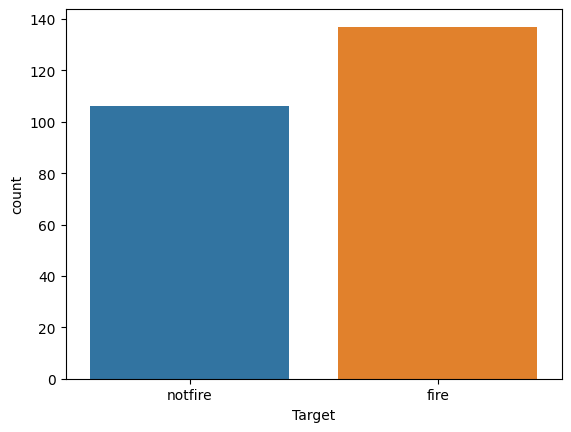

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x='Target', data=data)
plt.show()

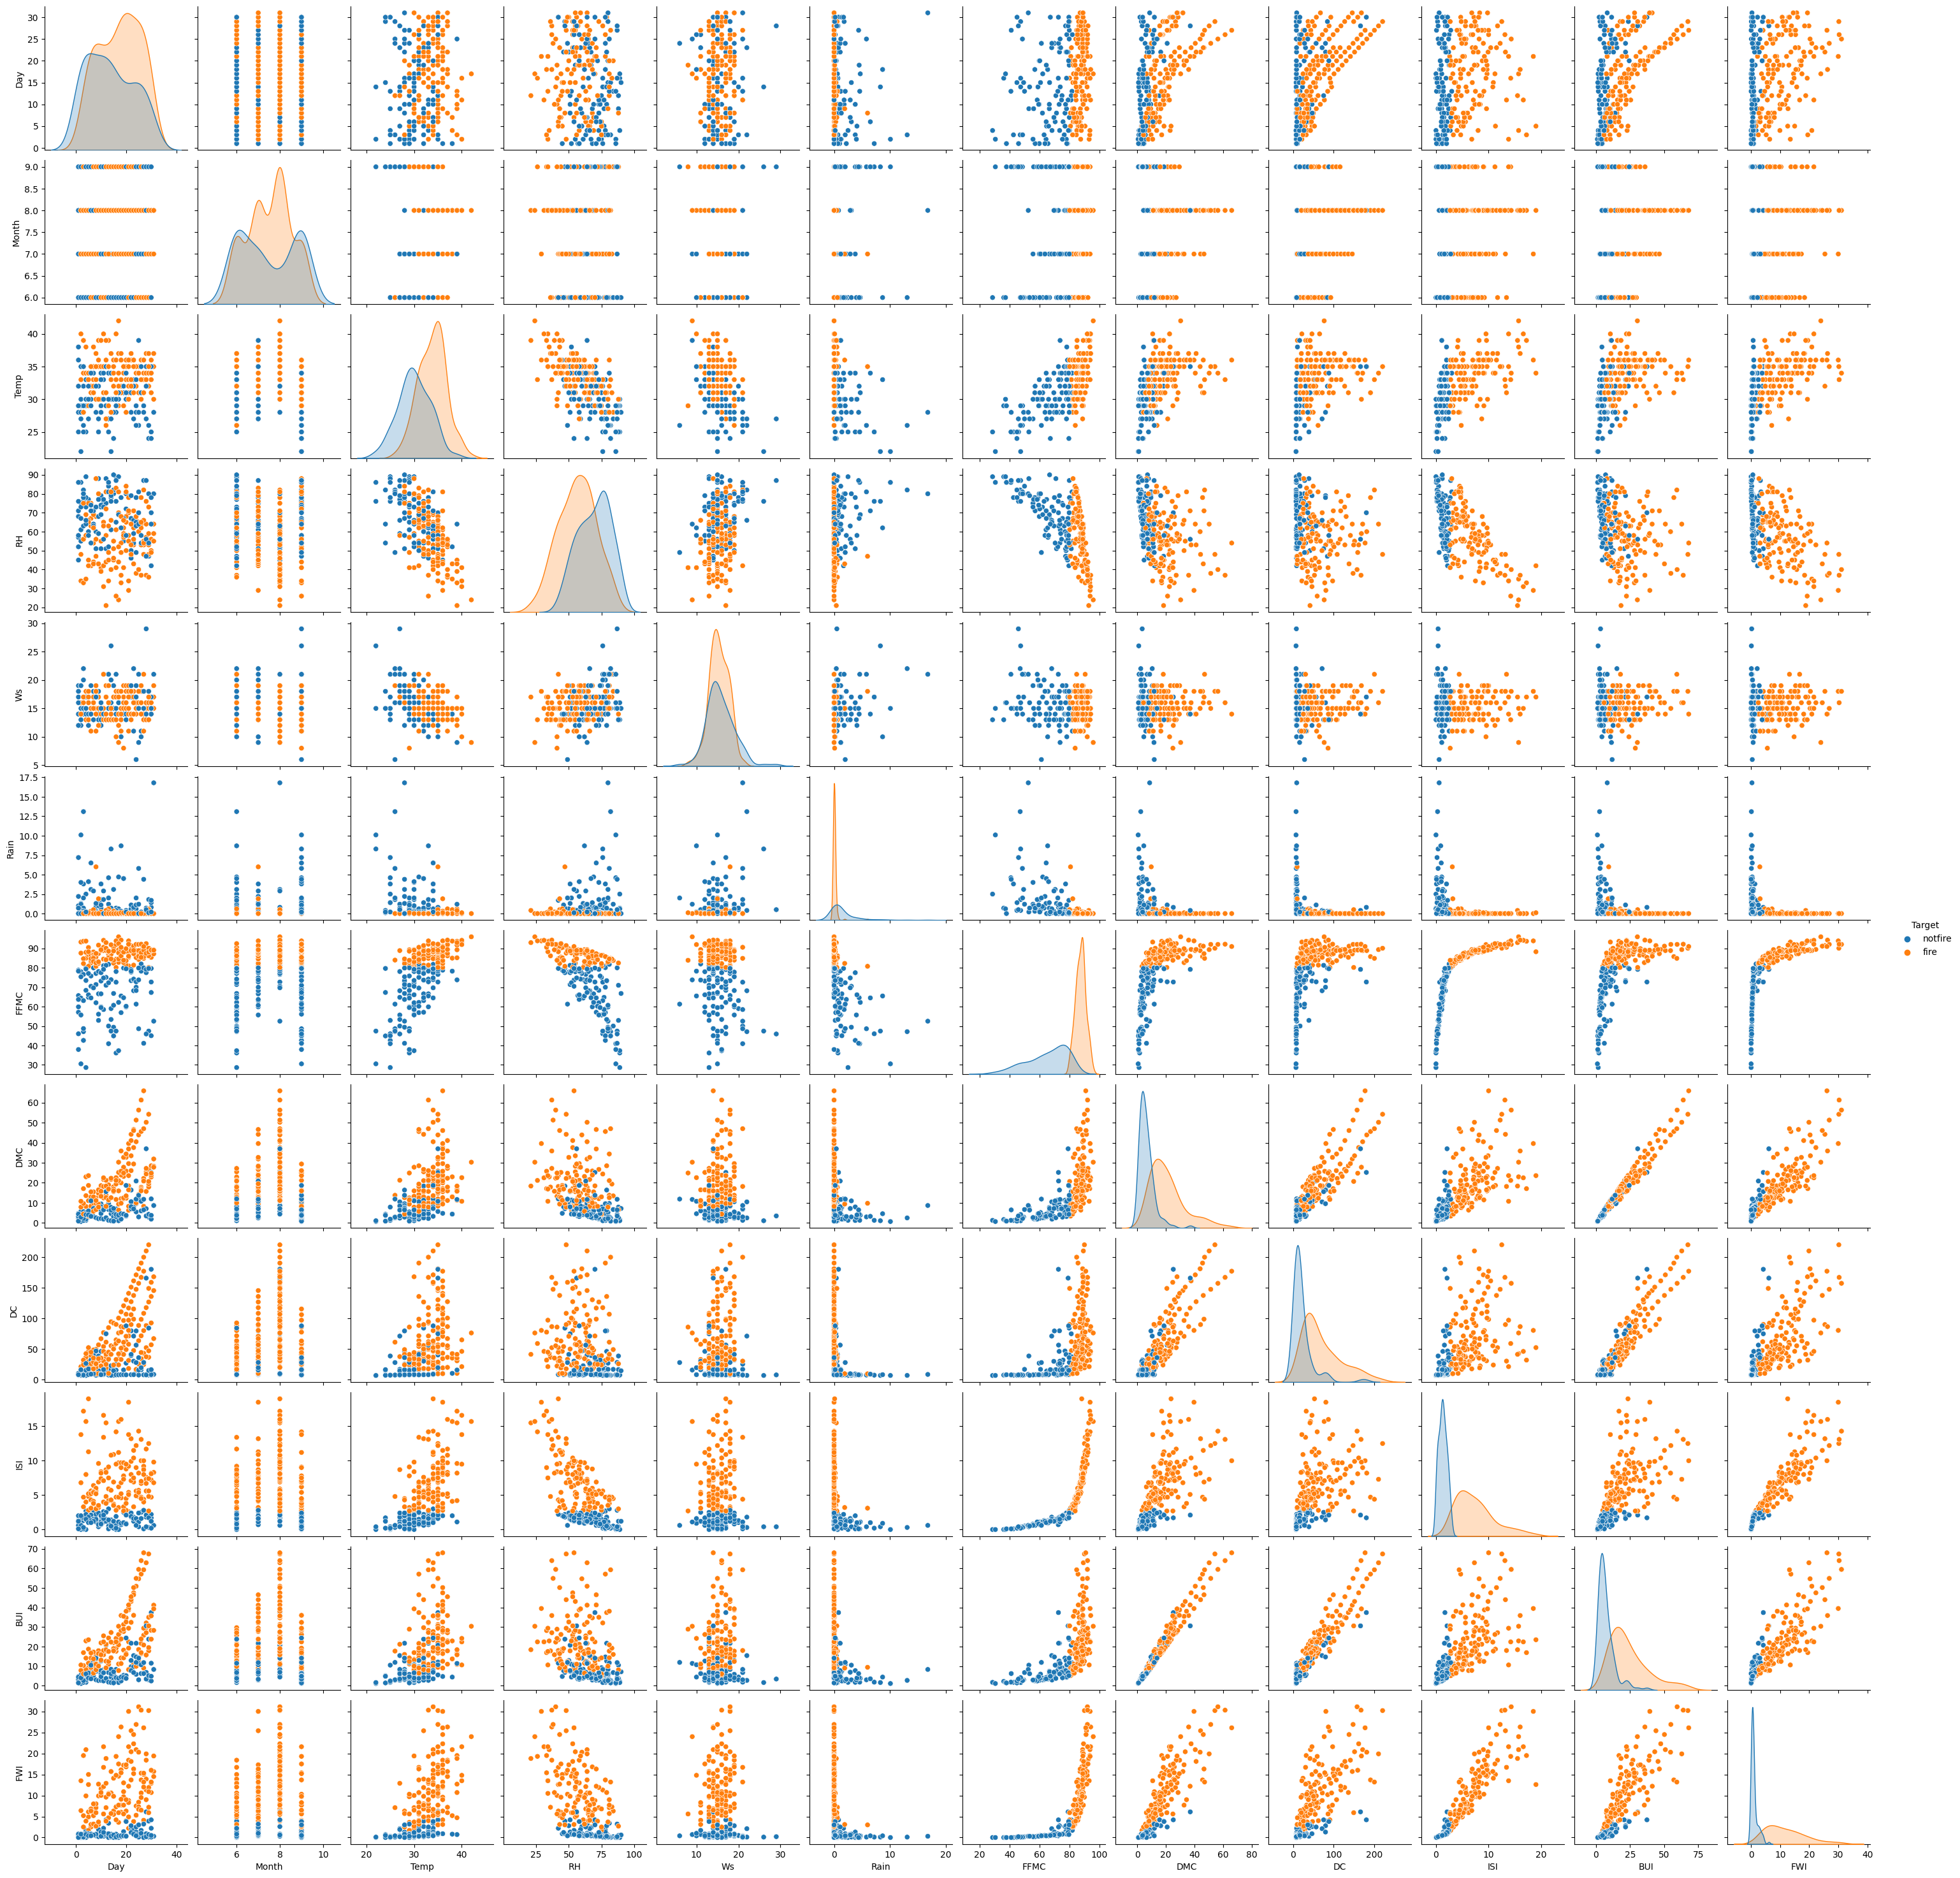

In [ ]:
# Visualize the relationship between the features and the target variable
sns.pairplot(data, hue='Target')
plt.show()

### Data Preprocessing

In [5]:
# Encode the target variable
le = LabelEncoder()
data['Target'] = le.fit_transform(data['Target'])

In [6]:
# Split the dataset into training and testing sets
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scale the features
sc = StandardScaler()
X = data[['Temp', 'RH', 'Ws', 'Rain']].values
X = sc.fit_transform(X)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Build the Models


## Model 1: Can we predict the burned area of a forest fire based on the weather conditions and other factors?

The model uses a regression model to forecast the burned area based on the weather factors for this topic. The code does this by using a linear regression model with numerous features, including temperature, humidity, wind speed, and precipitation. The code is given here using scikit-learn:

In [10]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.04081632653061224


The linear regression model's mean squared error (MSE) is 0.0408, indicating that the model makes predictions with a relatively low level of error. This means that the model can determine the burned area of a forest fire based on weather conditions (temperature, humidity, wind speed, and precipitation).

## Model 2: What is the relationship between the fire weather index (FWI) and the burned area?

A scatter plot can help show the relationship between the two variables in order to answer this issue. The correlation coefficient can also be calculated to identify the strength and direction of the link.

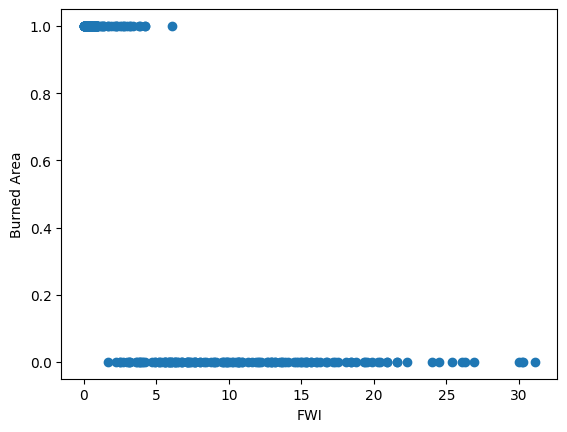

The correlation between FWI and burned area is: -0.7192161486674169


In [11]:
# Create a scatter plot
plt.scatter(data['FWI'], data['Target'])
plt.xlabel('FWI')
plt.ylabel('Burned Area')
plt.show()

# Calculate the correlation coefficient between FWI and Target
correlation = data['FWI'].corr(data['Target'])
print(f"The correlation between FWI and burned area is: {correlation}")


According to the scatter plot, the FWI value is a strong predictor of forest fire occurrence, with a distinct threshold distinguishing high and low fire likelihoods. The correlation coefficient of -0.719 indicates, this suggests a strong inverse relationship between the two variables. This implies that when the FWI index rises, the chance of a forest fire reduces. The negative sign shows that the variables are directly connected, which means that as one variable rises, the other falls..

## Model 3: Can we predict the cause of a forest fire based on the weather conditions?

This model will use a classification model to answer this question since it is an effective way to predict the cause of a forest fire based on weather circumstances. This will train the model to accurately forecast the cause of a forest fire based on the given weather circumstances by making the cause of the forest fire the target variable. This can then give information about the factors that contribute to forest fires.

In [12]:
# Evaluate the model using accuracy score
acc = accuracy_score(y_test, y_pred)
print('Accuracy score:', acc)

Accuracy score: 0.9591836734693877


This model's accuracy score of 0.9591 suggests that it is very good at predicting the cause of forest fires based on weather conditions. This means that the model classified the causes of 95.91% of the forest fires in the test data set accurately.

# Discussion of Results



## Model 1

A linear regression was used in this model. The MSE (mean squared error) is 0.0408. This indicates that the model can generate predictions with a low level of error and can determine the burned area of a forest fire depending on weather conditions.

The low MSE suggests that the model's predictions are more accurate than the actual values in the test data. This suggests that the model can be used to make meaningful predictions for real-world scenarios, such as anticipating the potential damage caused by a forest fire depending on meteorological conditions. Several elements besides weather conditions may influence the severity of a forest fire. As a result, it's critical to weigh the model's predictions with other criteria and expert knowledge.

## Model 2

According to the model analysis, the FWI value is a reliable predictor of forest fire occurrence. There is a definite threshold that separates between high and low fire likelihoods, making it an important variable in forest fire prediction. The correlation coefficient of -0.719 suggests that the two variables have a strong inverse association. As the FWI index rises, the likelihood of a forest fire decreases. The negative sign indicates that the variables are inextricably linked, implying that as one variable rises, the other declines.

According to the scatter plot, the FWI value is a significant predictor of forest fire occurrence. Values less than a specific threshold are connected with a high risk of forest fire, whereas values more than the threshold are associated with a low risk of forest fire.

Overall, the fire weather index is an important factor in the occurrence of forest fires. Yet, it is critical to remember that it is not the sole issue. Additional factors such as temperature, humidity, and wind speed may also be important. By taking all of these aspects into account, we may acquire a better knowledge of the risk factors connected with forest fires and build more effective prevention and management techniques.

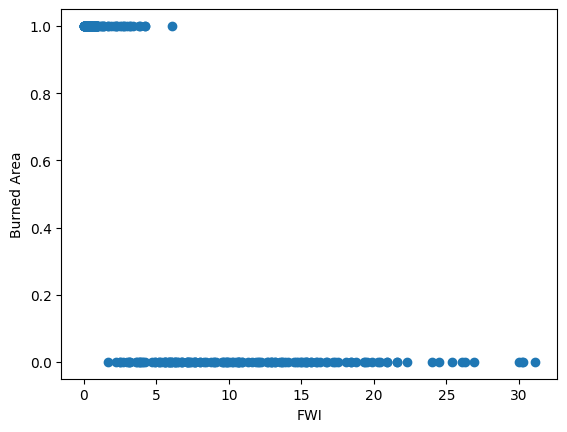

## Model 3

To answer this question, the model used was a classification model. The accuracy score of the model is 0.9591, indicating that it is very good at predicting the cause of forest fires based on weather circumstances. This means that the model correctly diagnosed the causes of 95.91% of the forest fires in the test dataset.

The carefully picked features used in the model, such as temperature, humidity, wind speed, rain, and month of the year, contribute to the model's high level of accuracy. These factors are recognised to have a significant impact on the likelihood and cause of a forest fire. The model was able to capture the most significant aspects that affect the cause of forest fires by incorporating these features.

Overall, this model can provide valuable insights into the elements that contribute to forest fires, as well as how to effectively prevent and manage them. It can, for example, assist authorities in identifying regions under high danger of forest fires and taking early actions to prevent them from occurring. This model can help us gain a better understanding of the underlying causes of forest fires and work towards a safer, more sustainable future.

# Conclusion





In conclusion, the Forest Fires dataset analysis gives useful insights into the elements that contribute to forest fires and how they might be predicted and managed. The linear regression model demonstrates that weather factors have a major impact on the burned area of a forest fire and may be used to create forecasts with a low degree of error. The analysis also demonstrates that the Fire Weather Index is a crucial element in the occurrence of forest fires and can be used as a reliable predictor of forest fire likelihood.

Based on weather circumstances, the classification model accurately predicts the causes of forest fires, providing to a better understanding of the underlying causes of forest fires. However, it is crucial to remember that the models only account for a limited number of variables, and other key factors, such as human activities or forest management techniques, may also contribute to forest fires.

To improve the analysis, future notebooks may consider adding new components or experimenting with different model methods. Additional data can also be used to improve the models' accuracy and dependability. Overall, the research provides important insights into the components that cause forest fires and how they might be addressed, but additional data in the set must be included to fully appreciate the complexity of forest fire prediction and prevention.

# References
- ABID, F. 2020. Predicting forest fire in Algeria using data mining techniques [Online] Available at: https://www.researchgate.net/profile/Faroudja-Abid/publication/339062373_Predicting_Forest_Fire_in_Algeria_Using_Data_Mining_Techniques_Case_Study_of_the_Decision_Tree_Algorithm/links/5f6862e4a6fdcc008631dcd8/Predicting-Forest-Fire-in-Algeria-Using-Data-Mining-Techniques-Case-Study-of-the-Decision-Tree-Algorithm.pdf [Accessed: 30 March 2023]. 

- National Park Service 2022. Wildfire causes and evaluations (U.S. National Park Service) [Online] Available at: https://www.nps.gov/articles/wildfire-causes-and-evaluation.htm [Accessed: 30 March 2023]. 

- Al Jazeera 2021. At least seven killed, two injured in Algeria forest fires [Online] Available at: https://www.aljazeera.com/news/2021/8/10/algeria-forest-fires#:~:text=Firefighters%20and%20helicopters%20are%20trying,residents%20in%20Tizi%20Ouzou%20province.&amp;text=At%20least%20seven%20people%20have,defence%20authority%20said%20on%20Tuesday. [Accessed: 30 March 2023]. 

- Sathishkumar, V.E. et al. 2023. Forest fire and smoke detection using Deep Learning-based learning without forgetting - fire ecology [Online] Available at: https://fireecology.springeropen.com/articles/10.1186/s42408-022-00165-0#:~:text=Hence%2C%20to%20assess%20the%20presence,2021%3B%20Ko%20et%20al. [Accessed: 30 March 2023]. 